## Context

We want to advise the Toyota Race Team. The objective is to develop a model able to predict if the Toyota car will win a race or not.

Telling the Toyota Team that they will win a race only for them to end up losing would be problematic. They might question the credibility of our model. 

On the other hand, predicting a loss for a race that Toyota would end up winning would be a pleasant surprise, or it could prove that our model might have prompted Toyota's engineers to adjust certain parameters to turn the outcome around. 

Our primary goal will be to produce a model capable of accurately predicting victories.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('WEC_DATA.xlsm', engine='openpyxl')

In [3]:
races = pd.read_excel('Races_Details.xlsx')

In [4]:
weather = pd.read_excel('Races_Details.xlsx',sheet_name='Feuil2')

In [5]:
cars = pd.read_excel('Cars_Specifications.xlsx')

## Data Pre-Processing

### Keep only LMP1 & Hypercar categories, the one including Toyota

In [6]:
df = df[df['class'].isin(['LMP1','LM P1','HYPERCAR'])]

### Keep only the most relevant columns for EDA and modeling

In [7]:
df = df[['car', 'class_position', 'team', 'vehicle', 'group', 'race', 'event_duration', 'season', 'laps', 'tyres', 'fl_time', 'fl_kph_average', 'driver_1', 'driver_2', 'driver_3']]

In [8]:
df.head()

,car,class_position,team,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
0,Toyota Racing #8,1,Toyota Racing,Toyota TS 040 - Hybrid,H,Silverstone,6,2014,167,Michelin,1:44.646,202.7,Anthony DAVIDSON,Nicolas LAPIERRE,Sebastien BUEMI
1,Toyota Racing #7,2,Toyota Racing,Toyota TS 040 - Hybrid,H,Silverstone,6,2014,166,Michelin,1:44.326,203.3,Alexander WURZ,Stephane SARRAZIN,Kazuki NAKAJIMA
2,Porsche Team #20,3,Porsche Team,Porsche 919 Hybrid,H,Silverstone,6,2014,165,Michelin,1:45.245,201.5,Timo BERNHARD,Mark WEBBER,Brendon HARTLEY
3,Rebellion Racing #12,4,Rebellion Racing,Lola B12/60 - Toyota,L,Silverstone,6,2014,159,Michelin,1:47.195,197.8,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
20,Audi Sport Team Joest #2,5,Audi Sport Team Joest,Audi R18 e-tron quattro,H,Silverstone,6,2014,94,Michelin,1:44.217,203.5,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER


### Count the null values

In [9]:
df.isnull().sum()

car                 0
class_position      0
team                0
vehicle             0
group             276
race                0
event_duration      0
season              0
laps                0
tyres               0
fl_time             2
fl_kph_average      2
driver_1            0
driver_2            0
driver_3           49
dtype: int64

### Data Types

In [10]:
df.dtypes

car                object
class_position      int64
team               object
vehicle            object
group              object
race               object
event_duration      int64
season              int64
laps                int64
tyres              object
fl_time            object
fl_kph_average    float64
driver_1           object
driver_2           object
driver_3           object
dtype: object

### Main statistics

In [11]:
df.describe()

,class_position,event_duration,season,laps,fl_kph_average
count,631.000000,631.000000,631.000000,631.000000,629.000000
mean,4.792393,9.736926,2016.774960,200.841521,199.686010
std,3.068996,7.150128,3.704147,83.422620,23.883425
min,1.000000,4.000000,2011.000000,1.000000,102.800000
25%,2.000000,6.000000,2014.000000,160.000000,181.000000
50%,4.000000,6.000000,2016.000000,193.000000,196.900000
75%,7.000000,8.000000,2019.000000,235.000000,213.600000
max,17.000000,24.000000,2023.000000,395.000000,248.600000


### FL_Time into Timedelta

In [12]:
df['fl_time'] = pd.to_timedelta('0:' + df['fl_time'])

### Check the null values

In [13]:
df[df['group'].isnull()]['vehicle'].unique()

array(['CLM P1/01 - AER', 'Rebellion R-One - AER',
       'ENSO CLM P1/01 - Nismo', 'Enso CLM P1/01 - Nismo',
       'Rebellion R13 - Gibson', 'BR Engineering BR1 - AER',
       'BR Engineering BR1 - Gibson', 'Ginetta G60-LT-P1 - Mecachrome',
       'Enso CLM P1/01 - Gibson', 'Ginetta G60-LT-P1-AER',
       'ENSO CLM P1/01 - Gibson', 'Enso CLM P1/01',
       'Alpine A480 - Gibson', 'Glickenhaus 007 LMH',
       'Vanwall Vandervell 680', 'Glickenhaus 007', 'Audi R18 TDI',
       'Peugeot 908', 'Peugeot 908 HDI-FAP', 'Lola B 10/60 Coupe-Toyota',
       'Lola Aston Martin', 'Pescarolo Judd', 'Oak Pescarolo-Judd',
       'Oreca Swiss Hy Tech-Hybrid', 'Zytek 09 SC',
       'Aston Martin AMR-One', 'Audi R18 e-tron quattro',
       'Toyota TS030 - Hybrid', 'Audi R18 ultra',
       'Lola B12/60 Coup√© - Toyota', 'HPD ARX 03a - Honda',
       'Audi R18 Ultra', 'Dome S102.5 - Judd', 'Oak Pescarolo - Judd',
       'Oak Pescarolo - Honda', 'Lola B12/60 Coupe - Toyota',
       'HPD ARX  03a - Honda

In [14]:
df[df['group'].isnull()]['driver_3'].unique()

array(['Christian KLIEN', 'Matheo TUSCHER', nan, 'Daniel ABT',
       'Nick HEIDFELD', 'Mathias BECHE', 'Tiago MONTEIRO',
       'Alexandre IMPERATORI', 'James ROSSITER', 'Pierre KAFFER',
       'Nelson PIQUET JR', 'Dominik KRAIHAMER', 'Marco BONANOMI',
       'Gustavo MENEZES', 'Renger VAN DER ZANDE', 'Jenson BUTTON',
       'Tom DILLMANN', 'Matevos ISAAKYAN', 'Bruno SENNA', 'Leo ROUSSEL',
       'Oliver TURVEY', 'Stoffel VANDOORNE', 'Sergey SIROTKIN',
       'Paolo RUBERTI', 'Brendon HARTLEY', 'Loic DUVAL', 'Egor ORUDZHEV',
       'Norman NATO', 'Guy SMITH', 'Louis DELETRAZ', 'Oliver WEBB',
       'Matthieu VAXIVIERE', 'Richard WESTBROOK', 'Olivier PLA',
       'Romain DUMAS', 'Ryan BRISCOE', 'Franck MAILLEUX',
       'Luis Felipe DERANI', 'Jacques VILLENEUVE', 'Esteban GUTIERREZ',
       'Tristan VAUTIER', 'Nathanael BERTHON', 'Joao Paulo DE OLIVEIRA',
       'Benoit Treluyer', 'Simon Pagenaud', 'Nicolas Minassian',
       'Anthony Davidson', 'Olivier Panis', 'Jeroen Bleekemolen',
 

Seems some cars or drivers appear many times in different ways. Let's correct it.

## Uniques values for every column

### Car column

In [15]:
pd.Series(df['car'].unique()).sort_values()

56    Action Express Racing #311
44           Alpine ELF Team #36
41         Alpine Elf Matmut #36
69     Aston Martin Racing #1007
70     Aston Martin Racing #1009
                 ...            
31        Toyota Gazoo Racing #9
12              Toyota Racing #1
13              Toyota Racing #2
1               Toyota Racing #7
0               Toyota Racing #8
Length: 75, dtype: object

### Remove the number of the team (specified with #)

In [16]:
df['car'] = df['car'].str.split('#', expand=False).str[0].str.strip()

In [17]:
pd.Series(df['car'].unique()).sort_values()

24        Action Express Racing
16              Alpine ELF Team
14            Alpine Elf Matmut
34          Aston Martin Racing
33     Audi Sport North America
3         Audi Sport Team Joest
8          Bykolles Racing Team
12             CEFC TRSM Racing
22              Cadillac Racing
11                  DragonSpeed
18             Ferrari AF Corse
23    Floyd Vanwall Racing Team
15           Glickenhaus Racing
19              Hertz Team JOTA
31                  Hope Racing
36                          JRM
28                Kronos Racing
4                         Lotus
6            Nissan Motorsports
30                   Oak Racing
29               Pescarolo Team
26          Peugeot Sport Total
17        Peugeot TotalEnergies
9              Porsche LMP Team
20    Porsche Penske Motorsport
1                  Porsche Team
21           Proton Competition
32              Quifel-Asm Team
2              Rebellion Racing
10                   SMP Racing
35               Strakka Racing
5       

We want to avoid getting different names for the same brand.

In [18]:
car_mapping = {
    'Alpine ELF Team' : 'Alpine Elf Matmut',
    'Porsche LMP Team' : 'Porsche Team',
    'Toyota Gazoo Racing' : 'Toyota Racing',
    'Audi Sport North America' : 'Audi Sport Team Joest',
    'Porsche Penske Motorsport' : 'Porsche Team',
    'Peugeot TotalEnergies' : 'Peugeot Sport Total',
    'Team Peugeot Total' : 'Peugeot Sport Total',
    'Team Bykolles' : 'Bykolles Racing Team'
}

In [19]:
df['car'] = df['car'].replace(car_mapping)

In [20]:
pd.Series(df['car'].unique()).sort_values()

19        Action Express Racing
11            Alpine Elf Matmut
26          Aston Martin Racing
3         Audi Sport Team Joest
5          Bykolles Racing Team
9              CEFC TRSM Racing
17              Cadillac Racing
8                   DragonSpeed
14             Ferrari AF Corse
18    Floyd Vanwall Racing Team
12           Glickenhaus Racing
15              Hertz Team JOTA
24                  Hope Racing
28                          JRM
21                Kronos Racing
4                         Lotus
6            Nissan Motorsports
23                   Oak Racing
22               Pescarolo Team
13          Peugeot Sport Total
1                  Porsche Team
16           Proton Competition
25              Quifel-Asm Team
2              Rebellion Racing
7                    SMP Racing
27               Strakka Racing
10                     Team LNT
20            Team Oreca Matmut
0                 Toyota Racing
dtype: object

### Class Position

In [21]:
pd.Series(df['class_position'].unique()).sort_values()

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
dtype: int64

### Team

In [22]:
pd.Series(df['team'].unique()).sort_values()

24        Action Express Racing
16              Alpine ELF Team
14            Alpine Elf Matmut
34          Aston Martin Racing
33     Audi Sport North America
3         Audi Sport Team Joest
8          Bykolles Racing Team
12             CEFC TRSM Racing
22              Cadillac Racing
11                  DragonSpeed
18             Ferrari AF Corse
23    Floyd Vanwall Racing Team
15           Glickenhaus Racing
19              Hertz Team JOTA
31                  Hope Racing
36                          JRM
28                Kronos Racing
4                         Lotus
6            Nissan Motorsports
30                   Oak Racing
29               Pescarolo Team
26          Peugeot Sport Total
17        Peugeot TotalEnergies
9              Porsche LMP Team
20    Porsche Penske Motorsport
1                  Porsche Team
21           Proton Competition
32              Quifel-Asm Team
2              Rebellion Racing
10                   SMP Racing
35               Strakka Racing
5       

Seems this column gives the same information as car column. We can remove it.

In [23]:
df.drop(columns=['team'],inplace=True)

In [24]:
df.head()

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
0,Toyota Racing,1,Toyota TS 040 - Hybrid,H,Silverstone,6,2014,167,Michelin,0 days 00:01:44.646000,202.7,Anthony DAVIDSON,Nicolas LAPIERRE,Sebastien BUEMI
1,Toyota Racing,2,Toyota TS 040 - Hybrid,H,Silverstone,6,2014,166,Michelin,0 days 00:01:44.326000,203.3,Alexander WURZ,Stephane SARRAZIN,Kazuki NAKAJIMA
2,Porsche Team,3,Porsche 919 Hybrid,H,Silverstone,6,2014,165,Michelin,0 days 00:01:45.245000,201.5,Timo BERNHARD,Mark WEBBER,Brendon HARTLEY
3,Rebellion Racing,4,Lola B12/60 - Toyota,L,Silverstone,6,2014,159,Michelin,0 days 00:01:47.195000,197.8,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
20,Audi Sport Team Joest,5,Audi R18 e-tron quattro,H,Silverstone,6,2014,94,Michelin,0 days 00:01:44.217000,203.5,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER


In [25]:
pd.Series(df['vehicle'].unique()).sort_values()

21              Alpine A480 - Gibson
38              Aston Martin AMR-One
9                           Audi R18
29                      Audi R18 TDI
43                    Audi R18 Ultra
3            Audi R18 e-tron quattro
40                    Audi R18 ultra
13          BR Engineering BR1 - AER
14       BR Engineering BR1 - Gibson
5                    CLM P1/01 - AER
26               Cadillac V-Series.R
49                       Dome - Judd
44                Dome S102.5 - Judd
18           ENSO CLM P1/01 - Gibson
10            ENSO CLM P1/01 - Nismo
19                    Enso CLM P1/01
16           Enso CLM P1/01 - Gibson
11            Enso CLM P1/01 - Nismo
24                      Ferrari 499P
15    Ginetta G60-LT-P1 - Mecachrome
17             Ginetta G60-LT-P1-AER
28                   Glickenhaus 007
22               Glickenhaus 007 LMH
48              HPD ARX  03a - Honda
42               HPD ARX 03a - Honda
53               HPD ARX 03c - Honda
33                 Lola Aston Martin
3

We need to check if these multiple values of cars really correspond to multiple cars or just to one with different names. 

#### Audi

In [26]:
df[df['vehicle']=='Audi R18']

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
549,Audi Sport Team Joest,8,Audi R18,H,Silverstone,6,2016,69,Michelin,0 days 00:01:40.628000,211.1,Lucas DI GRASSI,Loic DUVAL,Oliver JARVIS
551,Audi Sport Team Joest,9,Audi R18,H,Silverstone,6,2016,194,Michelin,0 days 00:01:40.461000,211.5,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
552,Audi Sport Team Joest,1,Audi R18,H,Spa,6,2016,160,Michelin,0 days 00:01:59.952000,210.2,Lucas DI GRASSI,Loic DUVAL,Oliver JARVIS
556,Audi Sport Team Joest,5,Audi R18,H,Spa,6,2016,155,Michelin,0 days 00:02:00.062000,210.0,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
586,Audi Sport Team Joest,1,Audi R18,H,Bahrain,6,2016,201,Michelin,0 days 00:01:41.511000,191.9,Lucas DI GRASSI,Loic DUVAL,Oliver JARVIS
587,Audi Sport Team Joest,2,Audi R18,H,Bahrain,6,2016,201,Michelin,0 days 00:01:42.634000,189.8,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
618,Audi Sport Team Joest,2,Audi R18,H,Cota,6,2016,186,Michelin,0 days 00:01:47.052000,185.5,Lucas DI GRASSI,Loic DUVAL,Oliver JARVIS
622,Audi Sport Team Joest,6,Audi R18,H,Cota,6,2016,180,Michelin,0 days 00:01:47.158000,185.3,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
649,Audi Sport Team Joest,2,Audi R18,H,Fuji,6,2016,244,Michelin,0 days 00:01:24.645000,194.1,Lucas DI GRASSI,Loic DUVAL,Oliver JARVIS
679,Audi Sport Team Joest,8,Audi R18,H,Fuji,6,2016,36,Michelin,0 days 00:01:25.476000,192.2,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER


In [27]:
df[df['vehicle']=='Audi R18 Ultra']

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
2536,Audi Sport Team Joest,1,Audi R18 Ultra,NaN,Spa,6,2012,160,Michelin,0 days 00:02:02.437000,205.9,Romain Dumas,Loic Duval,Marc Gene
2538,Audi Sport Team Joest,3,Audi R18 Ultra,NaN,Spa,6,2012,159,Michelin,0 days 00:02:02.868000,205.2,Marco Bonanomi,Oliver Jarvis,NaN
2690,Audi Sport Team Joest,3,Audi R18 Ultra,NaN,LeMans,24,2012,375,Michelin,0 days 00:03:25.514000,238.7,Marco Bonanomi,Oliver Jarvis,Mike Rockenfeller
2692,Audi Sport Team Joest,5,Audi R18 Ultra,NaN,LeMans,24,2012,366,Michelin,0 days 00:03:24.189000,240.3,Romain Dumas,Loic Duval,Marc Gene


Let's check if the Audi R18 was operating in 2012.

In [28]:
df[(df['vehicle']=='Audi R18') & (df['season']=='2012')]

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3


To make it clearer, let's add it to our mapping table

In [29]:
df[df['vehicle']=='Audi R18 e-tron quattro']

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
20,Audi Sport Team Joest,5,Audi R18 e-tron quattro,H,Silverstone,6,2014,94,Michelin,0 days 00:01:44.217000,203.5,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
25,Audi Sport Team Joest,8,Audi R18 e-tron quattro,H,Silverstone,6,2014,24,Michelin,0 days 00:01:44.656000,202.6,Lucas DI GRASSI,Loic DUVAL,Tom KRISTENSEN
28,Audi Sport Team Joest,2,Audi R18 e-tron quattro,H,Spa,6,2014,171,Michelin,0 days 00:02:02.600000,205.7,Lucas DI GRASSI,Loic DUVAL,Tom KRISTENSEN
31,Audi Sport Team Joest,5,Audi R18 e-tron quattro,H,Spa,6,2014,170,Michelin,0 days 00:02:03.018000,205.0,Marcel FaSSLER,Andre LOTTERER,Benoit TReLUYER
32,Audi Sport Team Joest,6,Audi R18 e-tron quattro,H,Spa,6,2014,169,Michelin,0 days 00:02:03.383000,204.4,Filipe ALBUQUERQUE,Marco BONANOMI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,Audi Sport Team Joest,1,Audi R18 e-tron quattro,NaN,LeMans,24,2013,348,Michelin,0 days 00:03:23.269000,241.4,Tom KRISTENSEN,Loic DUVAL,Allan McNISH
2953,Audi Sport Team Joest,3,Audi R18 e-tron quattro,NaN,LeMans,24,2013,347,Michelin,0 days 00:03:24.293000,240.2,Marc GENe,Lucas DI GRASSI,Oliver JARVIS
2955,Audi Sport Team Joest,5,Audi R18 e-tron quattro,NaN,LeMans,24,2013,338,Michelin,0 days 00:03:22.746000,242.0,Andre LOTTERER,Marcel FaSSLER,Benoit TReLUYER
3007,Audi Sport Team Joest,1,Audi R18 e-tron quattro,NaN,Cota,6,2013,187,Michelin,0 days 00:01:47.868000,184.1,Tom KRISTENSEN,Loic DUVAL,Allan McNISH


In [30]:
pd.Series(df['vehicle'].unique()).sort_values()

21              Alpine A480 - Gibson
38              Aston Martin AMR-One
9                           Audi R18
29                      Audi R18 TDI
43                    Audi R18 Ultra
3            Audi R18 e-tron quattro
40                    Audi R18 ultra
13          BR Engineering BR1 - AER
14       BR Engineering BR1 - Gibson
5                    CLM P1/01 - AER
26               Cadillac V-Series.R
49                       Dome - Judd
44                Dome S102.5 - Judd
18           ENSO CLM P1/01 - Gibson
10            ENSO CLM P1/01 - Nismo
19                    Enso CLM P1/01
16           Enso CLM P1/01 - Gibson
11            Enso CLM P1/01 - Nismo
24                      Ferrari 499P
15    Ginetta G60-LT-P1 - Mecachrome
17             Ginetta G60-LT-P1-AER
28                   Glickenhaus 007
22               Glickenhaus 007 LMH
48              HPD ARX  03a - Honda
42               HPD ARX 03a - Honda
53               HPD ARX 03c - Honda
33                 Lola Aston Martin
3

#### BR Engineering

In [31]:
df[df['vehicle']=='BR Engineering BR1 - Gibson']

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
1136,DragonSpeed,4,BR Engineering BR1 - Gibson,NaN,Silverstone,6,2018,165,Michelin,0 days 00:01:45.231000,201.9,Henrik HEDMAN,Ben HANLEY,Renger VAN DER ZANDE
1210,DragonSpeed,6,BR Engineering BR1 - Gibson,NaN,Fuji,6,2018,179,Michelin,0 days 00:01:28.731000,185.1,James ALLEN,Ben HANLEY,NaN
1261,DragonSpeed,7,BR Engineering BR1 - Gibson,NaN,LeMans,24,2018,244,Michelin,0 days 00:03:22.064000,242.8,Henrik HEDMAN,Ben HANLEY,Renger VAN DER ZANDE
1332,DragonSpeed,8,BR Engineering BR1 - Gibson,NaN,LeMans,24,2019,76,Michelin,0 days 00:03:22.565000,242.2,Henrik HEDMAN,Ben HANLEY,Renger VAN DER ZANDE
1340,DragonSpeed,6,BR Engineering BR1 - Gibson,NaN,Shanghai,6,2018,110,Michelin,0 days 00:02:04.702000,157.4,James ALLEN,Ben HANLEY,Renger VAN DER ZANDE
1401,DragonSpeed,6,BR Engineering BR1 - Gibson,NaN,Sebring,8,2019,143,Michelin,0 days 00:01:45.266000,205.8,Henrik HEDMAN,Ben HANLEY,Renger VAN DER ZANDE


Same thing here. BR Engineering BR1 can be considered as one car.

### Vehicle Mapping

To make it simpler, we will adjust most of the cars' names to reduce the number of distinct names for a car.

In [32]:
vehicle_mapping = {
    'Audi R18 Ultra' : 'Audi R18',
    'Audi R18 ultra' : 'Audi R18',
    'Audi R18 e-tron quattro' : 'Audi R18',
    'Audi R18 TDI' : 'Audi R18',
    'BR Engineering BR1 - AER' : 'BR Engineering BR1',
    'BR Engineering BR1 - Gibson' : 'BR Engineering BR1',
    'ENSO CLM P1/01 - Gibson' : 'Enso CLM P1/01',
    'ENSO CLM P1/01 - Nismo' : 'Enso CLM P1/01',
    'Enso CLM P1/01 - Gibson' : 'Enso CLM P1/01',
    'Enso CLM P1/01 - Nismo' : 'Enso CLM P1/01',
    'Lola B12/60 Coupe - Toyota' : 'Lola B12/60 - Toyota',
    'Lola B12/60 Coup√© - Toyota' : 'Lola B12/60 - Toyota',
    'Toyota TS 030 - Hybrid' : 'Toyota TS030 - Hybrid',
    'Toyota TS 040 - Hybrid' : 'Toyota TS040 - Hybrid',
    'Glickenhaus 007 LMH' : 'Glickenhaus 007'
}

In [33]:
df['vehicle'] = df['vehicle'].replace(vehicle_mapping)

In [34]:
pd.Series(df['vehicle'].unique()).sort_values()

15              Alpine A480 - Gibson
30              Aston Martin AMR-One
3                           Audi R18
11                BR Engineering BR1
5                    CLM P1/01 - AER
20               Cadillac V-Series.R
37                       Dome - Judd
33                Dome S102.5 - Judd
9                     Enso CLM P1/01
18                      Ferrari 499P
12    Ginetta G60-LT-P1 - Mecachrome
13             Ginetta G60-LT-P1-AER
16                   Glickenhaus 007
36              HPD ARX  03a - Honda
32               HPD ARX 03a - Honda
40               HPD ARX 03c - Honda
25                 Lola Aston Martin
24         Lola B 10/60 Coupe-Toyota
2               Lola B12/60 - Toyota
7               Nissan GT-R LM Nismo
35             Oak Pescarolo - Honda
34              Oak Pescarolo - Judd
27                Oak Pescarolo-Judd
28        Oreca Swiss Hy Tech-Hybrid
39                  Pescarolo - Judd
38               Pescarolo 03 - Judd
26                    Pescarolo Judd
2

We just need to map the main vehicles. In our model, we will only take into account the main competitors of Toyota like Porsche, Audi or Rebellion Racing.

### Group

In [35]:
df['group'].unique()

array(['H', 'L', nan], dtype=object)

In [36]:
df[df['group']=='L']

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
3,Rebellion Racing,4,Lola B12/60 - Toyota,L,Silverstone,6,2014,159,Michelin,0 days 00:01:47.195000,197.8,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
24,Rebellion Racing,7,Lola B12/60 - Toyota,L,Silverstone,6,2014,24,Michelin,0 days 00:01:47.120000,198.0,Dominik KRAIHAMER,Andrea BELICCHI,Fabio LEIMER
33,Rebellion Racing,7,Rebellion R-One - Toyota,L,Spa,6,2014,161,Michelin,0 days 00:02:08.928000,195.6,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
54,Rebellion Racing,9,Rebellion R-One - Toyota,L,Spa,6,2014,47,Michelin,0 days 00:02:13.217000,189.3,Dominik KRAIHAMER,Andrea BELICCHI,Fabio LEIMER
60,Rebellion Racing,6,Rebellion R-One - Toyota,L,Bahrain,6,2014,188,Michelin,0 days 00:01:50.022000,177.1,Dominik KRAIHAMER,Andrea BELICCHI,Fabio LEIMER
61,Rebellion Racing,7,Rebellion R-One - Toyota,L,Bahrain,6,2014,182,Michelin,0 days 00:01:49.164000,178.5,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
81,Lotus,9,CLM P1/01 - AER,L,Bahrain,6,2014,1,Michelin,NaT,NaN,Pierre KAFFER,Simon TRUMMER,Nathanael BERTHON
88,Rebellion Racing,7,Rebellion R-One - Toyota,L,Cota,6,2014,149,Michelin,0 days 00:01:53.733000,174.6,Nicolas PROST,Nick HEIDFELD,Mathias BECHE
96,Lotus,8,CLM P1/01 - AER,L,Cota,6,2014,140,Michelin,0 days 00:01:59.547000,166.1,Christophe BOUCHUT,James ROSSITER,Lucas AUER
109,Rebellion Racing,9,Rebellion R-One - Toyota,L,Cota,6,2014,88,Michelin,0 days 00:01:54.576000,173.3,Dominik KRAIHAMER,Andrea BELICCHI,Fabio LEIMER


Looks like this column stands for a category. Let's keep it for now.

### Race

In [37]:
df['race'].unique()

array(['Silverstone', 'Spa', 'Bahrain', 'Cota', 'Fuji', 'Interlagos',
       'LeMans', 'Shanghai', 'Nurburgring', 'Mexico', 'Sebring',
       'Algarve', 'Monza'], dtype=object)

Nothing to change. Every race is well written. There is no race that is written in two different ways.

### Event Duration

In [38]:
df['event_duration'].unique()

array([ 6, 24,  8,  4, 12], dtype=int64)

### Season

In [39]:
df['season'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2011,
       2012, 2013], dtype=int64)

### Tyres

In [40]:
df['tyres'].unique()

array(['Michelin', 'Dunlop'], dtype=object)

### Driver Columns

In [41]:
pd.set_option('display.max_rows', None)

In [42]:
pd.Series(df['driver_1'].unique()).sort_values

<bound method Series.sort_values of 0           Anthony DAVIDSON
1             Alexander WURZ
2              Timo BERNHARD
3              Nicolas PROST
4             Marcel FaSSLER
5               Romain DUMAS
6          Dominik KRAIHAMER
7            Lucas DI GRASSI
8         Filipe ALBUQUERQUE
9              Pierre KAFFER
10        Christophe BOUCHUT
11             Simon TRUMMER
12           Nico HuLKENBERG
13      Alexandre IMPERATORI
14           Harry TINCKNELL
15               Olivier PLA
16            Tsugio MATSUDA
17         Stephane SARRAZIN
18            Matheo TUSCHER
19           Sebastien BUEMI
20                 Neel JANI
21               Mike CONWAY
22               Oliver WEBB
23          Nicolas LAPIERRE
24             Mathias BECHE
25             Henrik HEDMAN
26           Mikhail ALESHIN
27               James ALLEN
28            Thomas LAURENT
29            Andre LOTTERER
30         Charles ROBERTSON
31             Vitaly PETROV
32            Oliver ROWLAND
33     

### Mapping function

In [43]:
driver_mapping = {
    'S√©bastien Bourdais' : 'Sebastien Bourdais',
    'Marc GEN√â' : 'Marc Gene',
    'Marc Gen√©' : 'Marc Gene',
    'Marcel F√§ssler' : 'Marcel Fassler',
    'S√©bastien BOURDAIS' : 'Sebastien Bourdais',
    'K√©vin ESTRE' : 'Kevin ESTRE',
    'Nathana√´l BERTHON' : 'Nathanael Berthon',
    'Marcel F√ÑSSLER' : 'Marcel Fassler',
    'Nico H√úLKENBERG' : 'Nico Hulkenberg',
    'St√©phane SARRAZIN' : 'Stephane Sarrazin',
    'St√©Phane Sarrazin' : 'Stephane Sarrazin',
    'St√©Phane Sarrazin' : 'Stephane Sarrazin',
    'S√©bastien BUEMI' : 'Sebastien Buemi',
    'Andr√© LOTTERER' : 'Andre Lotterer',
    'Lo√Øc Duval' :  'Loic Duval',
    'Andr√© Negr√Éo' : 'Andre Negrao',
    'Math√©O Tuscher' : 'Matheo Tuscher',
    'Ren√© Binder' : 'Rene Binder',
    'S√©Bastien Buemi' : 'Sebastien Buemi',
    'Benoit Tr√Âluyer' : 'Benoit Treluyer',
    'Andr√© Lotterer' : 'Andre Lotterer',
    'J.Christophe Boullion' : 'Jean-Christophe Boullion',
    'Beno√Æt Tr√Âluyer' : 'Benoit Treluyer',
    'Ren√© Rast' : 'Rene Rast',
    'Lucas Ordo√Ëez' : 'Lucas Ordonez',
    'Nico M√Úller' : 'Nico Muller',
    'Jean-Fran√Ssois Yvon' : 'Jean-Francois Yvon',
    'Benoit Tr√©Luyer' : 'Benoit Treluyer',
    'Benoit Tr√Âluyer' : 'Benoit Treluyer',
    'Jean-√Âric Vergne' : 'Jean-Eric Vergne',
    'Fr√©D√©Ric Makowiecki' : 'Frederic Makowiecki'
}

In [44]:
def change_driver(row):
    for col in ['driver_1','driver_2','driver_3']:
        row[col] = row[col].replace(driver_mapping)
        row[col] = row[col].str.title() #To only have a capital letter at the beginning of first name and last name
    return row

In [45]:
df = change_driver(df)

In [46]:
pd.Series(df['driver_3'].unique()).sort_values

<bound method Series.sort_values of 0            Sebastien Buemi
1            Kazuki Nakajima
2            Brendon Hartley
3              Mathias Beche
4            Benoit Treluyer
5                  Marc Lieb
6               Fabio Leimer
7             Tom Kristensen
8                        NaN
9                Mike Conway
10         Nathanael Berthon
11                Lucas Auer
12             Pierre Kaffer
13             Oliver Jarvis
14           Christian Klien
15                 Rene Rast
16                Nick Tandy
17            Matheo Tuscher
18                Daniel Abt
19             Nick Heidfeld
20             Alex Buncombe
21               Max Chilton
22             Lucas Ordonez
23            Tiago Monteiro
24           Kamui Kobayashi
25      Alexandre Imperatori
26            James Rossiter
27          Nelson Piquet Jr
28         Dominik Kraihamer
29          Jose Maria Lopez
30          Nicolas Lapierre
31            Marco Bonanomi
32         Stephane Sarrazin
33     

## EDA

In [47]:
df.head()

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
0,Toyota Racing,1,Toyota TS040 - Hybrid,H,Silverstone,6,2014,167,Michelin,0 days 00:01:44.646000,202.7,Anthony Davidson,Nicolas Lapierre,Sebastien Buemi
1,Toyota Racing,2,Toyota TS040 - Hybrid,H,Silverstone,6,2014,166,Michelin,0 days 00:01:44.326000,203.3,Alexander Wurz,Stephane Sarrazin,Kazuki Nakajima
2,Porsche Team,3,Porsche 919 Hybrid,H,Silverstone,6,2014,165,Michelin,0 days 00:01:45.245000,201.5,Timo Bernhard,Mark Webber,Brendon Hartley
3,Rebellion Racing,4,Lola B12/60 - Toyota,L,Silverstone,6,2014,159,Michelin,0 days 00:01:47.195000,197.8,Nicolas Prost,Nick Heidfeld,Mathias Beche
20,Audi Sport Team Joest,5,Audi R18,H,Silverstone,6,2014,94,Michelin,0 days 00:01:44.217000,203.5,Marcel Fassler,Andre Lotterer,Benoit Treluyer


### Check the victories of Toyota

In [48]:
toyota_wins = df[(df['car']=='Toyota Racing') & (df['class_position']==1)]

#### Per Race

In [49]:
toyota_wins_count_race = toyota_wins.groupby('race').size()

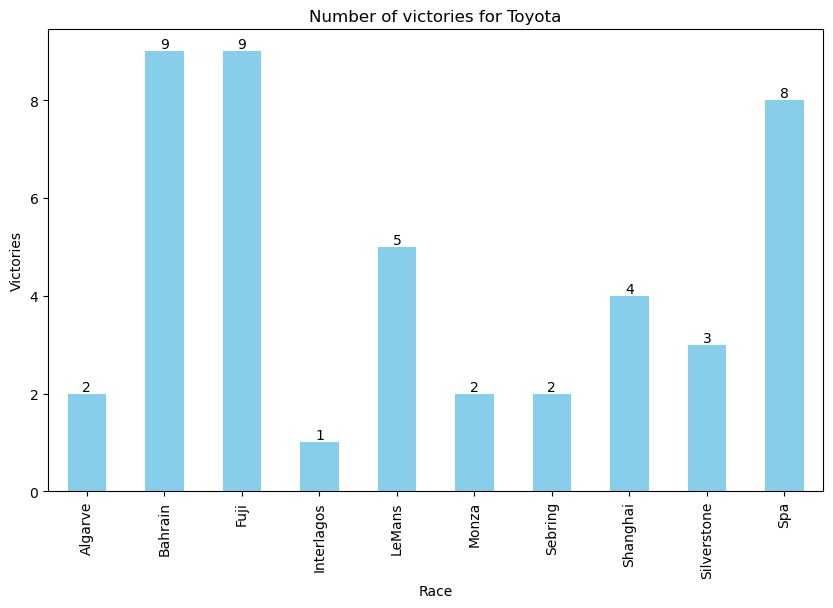

In [50]:
# Figure
plt.figure(figsize=(10, 6))
toyota_wins_count_race.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of victories for Toyota')
plt.xlabel('Race')
plt.ylabel('Victories')

# Data on the figure
for i, value in enumerate(toyota_wins_count_race):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display
plt.show()

In [51]:
toyota_wins_count_year = toyota_wins.groupby('season').size()

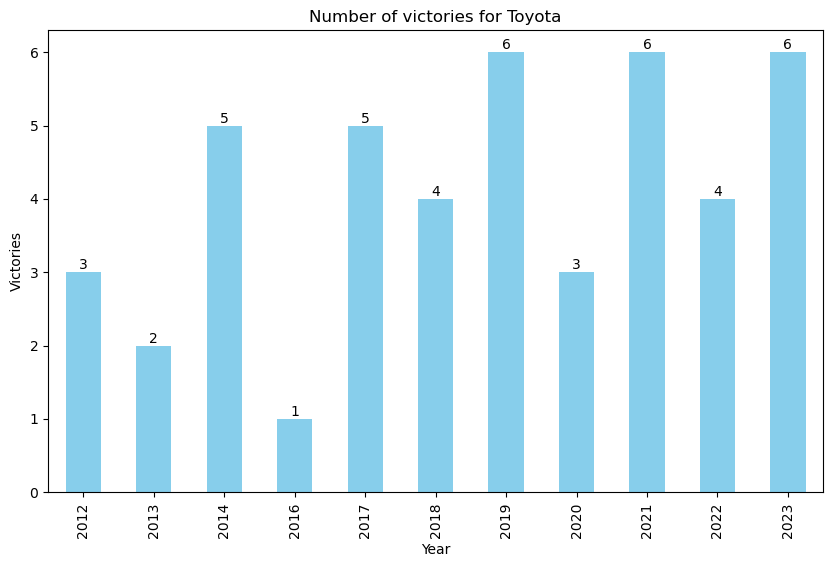

In [52]:
# Figure
plt.figure(figsize=(10, 6))
toyota_wins_count_year.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of victories for Toyota')
plt.xlabel('Year')
plt.ylabel('Victories')

# Data on the figure
for i, value in enumerate(toyota_wins_count_year):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display
plt.show()

#### Per Vehicle

In [53]:
toyota_wins_count_vehicle = toyota_wins.groupby('vehicle').size()

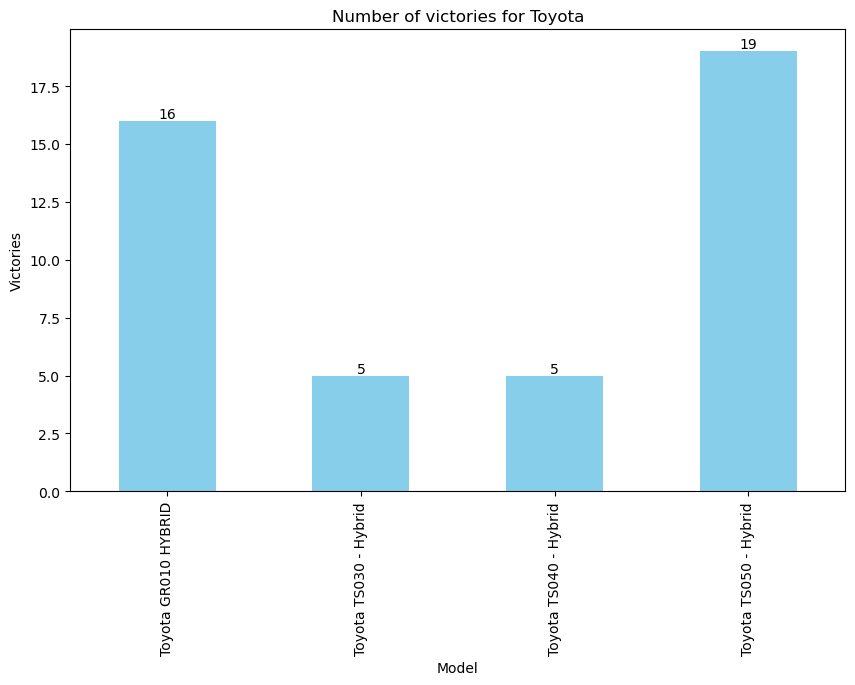

In [54]:
# Figure
plt.figure(figsize=(10, 6))
toyota_wins_count_vehicle.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of victories for Toyota')
plt.xlabel('Model')
plt.ylabel('Victories')

# Data on the figure
for i, value in enumerate(toyota_wins_count_vehicle):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display
plt.show()

In [55]:
toyota_wins_count_duration = toyota_wins.groupby('event_duration').size()

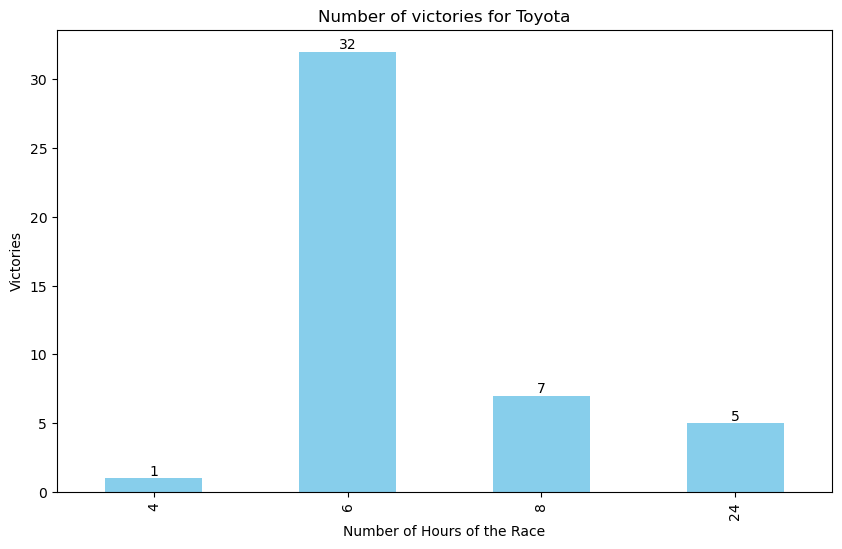

In [56]:
# Figure
plt.figure(figsize=(10, 6))
toyota_wins_count_duration.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of victories for Toyota')
plt.xlabel('Number of Hours of the Race')
plt.ylabel('Victories')

# Data on the figure
for i, value in enumerate(toyota_wins_count_duration):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display
plt.show()

Looks like Toyota is doing better on some tracks, with the most recent car, in 6-hour format races.

## Create the dataframe for Supervised Learning

In [57]:
df.head()

,car,class_position,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,driver_2,driver_3
0,Toyota Racing,1,Toyota TS040 - Hybrid,H,Silverstone,6,2014,167,Michelin,0 days 00:01:44.646000,202.7,Anthony Davidson,Nicolas Lapierre,Sebastien Buemi
1,Toyota Racing,2,Toyota TS040 - Hybrid,H,Silverstone,6,2014,166,Michelin,0 days 00:01:44.326000,203.3,Alexander Wurz,Stephane Sarrazin,Kazuki Nakajima
2,Porsche Team,3,Porsche 919 Hybrid,H,Silverstone,6,2014,165,Michelin,0 days 00:01:45.245000,201.5,Timo Bernhard,Mark Webber,Brendon Hartley
3,Rebellion Racing,4,Lola B12/60 - Toyota,L,Silverstone,6,2014,159,Michelin,0 days 00:01:47.195000,197.8,Nicolas Prost,Nick Heidfeld,Mathias Beche
20,Audi Sport Team Joest,5,Audi R18,H,Silverstone,6,2014,94,Michelin,0 days 00:01:44.217000,203.5,Marcel Fassler,Andre Lotterer,Benoit Treluyer


We want to create a dataframe with a column Competitor1 and a column Competitor2. We need to get the 2 main competitors of Toyota for every race.

### Keep only the top 5 for every race

In [58]:
competitors = df[df['class_position'].isin([1,2,3,4,5])]

### Withdraw Toyota. We only want the competitors

In [59]:
competitors = competitors[competitors['car']!='Toyota Racing']

### Take the 2 cars with the best ranks in the output dataframe

In [60]:
competitors = competitors.groupby(['race', 'season']).apply(lambda x: x.nsmallest(2, 'class_position')).reset_index(drop=True)

### Keep only the significant columns

In [61]:
competitors = competitors[['car','vehicle','class_position','race','season','tyres','fl_time','fl_kph_average','driver_1','driver_2','driver_3']]

## Feature Engineering : Add new features

### Add columns with the information of the 2 main competitors of Toyota for every race

In [62]:
# Identify the lowest value corresponding to the car with the best ranking. It will be the first competitor. Get the information for this car.
min_position_cars = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'car']]
min_position_vehicle = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'vehicle']]
min_position_tyres = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'tyres']]
min_position_fltime = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'fl_time']]
min_position_flspeed = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'fl_kph_average']]
min_position_driver1 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'driver_1']]
min_position_driver2 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'driver_2']]
min_position_driver3 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmin()][['race', 'season', 'driver_3']]


# Rename the columns in the new dataframe with the names we want to have in df
min_position_cars.rename(columns={'car': 'Competitor1'}, inplace=True)
min_position_vehicle.rename(columns={'vehicle': 'Competitor1_Vehicle'}, inplace=True)
min_position_tyres.rename(columns={'tyres': 'Competitor1_Tyres'}, inplace=True)
min_position_fltime.rename(columns={'fl_time': 'Competitor1_Best_Time'}, inplace=True)
min_position_flspeed.rename(columns={'fl_kph_average': 'Competitor1_Best_Speed'}, inplace=True)
min_position_driver1.rename(columns={'driver_1': 'Competitor1_Driver1'}, inplace=True)
min_position_driver2.rename(columns={'driver_2': 'Competitor1_Driver2'}, inplace=True)
min_position_driver3.rename(columns={'driver_3': 'Competitor1_Driver3'}, inplace=True)

# Merge df with the new dataframes
df = pd.merge(df, min_position_cars, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_vehicle, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_tyres, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_fltime, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_flspeed, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_driver1, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_driver2, on=['race', 'season'], how='left')
df = pd.merge(df, min_position_driver3, on=['race', 'season'], how='left')

In [63]:
# Identify the highest value corresponding to the car with the worst ranking. It will be the first competitor. Get the information for this car.
max_position_cars = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'car']]
max_position_vehicle = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'vehicle']]
max_position_tyres = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'tyres']]
max_position_fltime = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'fl_time']]
max_position_flspeed = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'fl_kph_average']]
max_position_driver1 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'driver_1']]
max_position_driver2 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'driver_2']]
max_position_driver3 = competitors.loc[competitors.groupby(['race', 'season'])['class_position'].idxmax()][['race', 'season', 'driver_3']]


# Rename the columns in the new dataframe with the names we want to have in df
max_position_cars.rename(columns={'car': 'Competitor2'}, inplace=True)
max_position_vehicle.rename(columns={'vehicle': 'Competitor2_Vehicle'}, inplace=True)
max_position_tyres.rename(columns={'tyres': 'Competitor2_Tyres'}, inplace=True)
max_position_fltime.rename(columns={'fl_time': 'Competitor2_Best_Time'}, inplace=True)
max_position_flspeed.rename(columns={'fl_kph_average': 'Competitor2_Best_Speed'}, inplace=True)
max_position_driver1.rename(columns={'driver_1': 'Competitor2_Driver1'}, inplace=True)
max_position_driver2.rename(columns={'driver_2': 'Competitor2_Driver2'}, inplace=True)
max_position_driver3.rename(columns={'driver_3': 'Competitor2_Driver3'}, inplace=True)

# Merge df with the new dataframes
df = pd.merge(df, max_position_cars, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_vehicle, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_tyres, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_fltime, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_flspeed, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_driver1, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_driver2, on=['race', 'season'], how='left')
df = pd.merge(df, max_position_driver3, on=['race', 'season'], how='left')

## Keep only the lines with Toyota in the car column

In [64]:
df = df[df['car']=='Toyota Racing']

### Keep only one line per edition of a race. We keep the one with the best ranking for Toyota

In [65]:
df = df.loc[df.groupby(['race', 'season'])['class_position'].idxmin()]#minimal value corresponds to the best ranking

In [66]:
def winning_or_not(row):
    if row['class_position'] == 1:
        return 'Victory'
    else:
        return 'Defeat'

In [67]:
df['Result'] = df.apply(winning_or_not, axis=1)

### Check the balance between victories and defeats

It could affect the accuracy of the model.

In [68]:
df['Result'].value_counts(normalize=True)

Result
Victory    0.536585
Defeat     0.463415
Name: proportion, dtype: float64

Looks balanced. It's a great news!

### Remove car and class_position columns

These columns are now useless. We already the result column as output of the race, and we know every line corresponds to Toyota vs its competitors.

In [69]:
df.drop(columns=['car','class_position'],inplace=True)

In [70]:
df

,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,...,Competitor1_Driver3,Competitor2,Competitor2_Vehicle,Competitor2_Tyres,Competitor2_Best_Time,Competitor2_Best_Speed,Competitor2_Driver1,Competitor2_Driver2,Competitor2_Driver3,Result
359,Toyota GR010 HYBRID,H,Algarve,8,2021,300,Michelin,0 days 00:01:31.006000,184.1,Sebastien Buemi,...,Matthieu Vaxiviere,Glickenhaus Racing,Glickenhaus 007,Michelin,0 days 00:01:32.451000,181.2,Ryan Briscoe,Romain Dumas,Richard Westbrook,Victory
423,Toyota GR010 HYBRID,H,Algarve,6,2023,222,Michelin,0 days 00:01:32.378000,181.3,Sebastien Buemi,...,Nicklas Nielsen,Porsche Team,Porsche 963,Michelin,0 days 00:01:33.304000,179.5,Kevin Estre,Andre Lotterer,Laurens Vanthoor,Victory
538,Toyota TS030 - Hybrid,NaN,Bahrain,6,2012,144,Michelin,0 days 00:01:47.128000,181.9,Alexander Wurz,...,Benoit Treluyer,Audi Sport Team Joest,Audi R18,Michelin,0 days 00:01:47.140000,181.8,Tom Kristensen,Allan Mcnish,NaN,Defeat
600,Toyota TS030 - Hybrid,NaN,Bahrain,6,2013,199,Michelin,0 days 00:01:44.323000,186.8,Anthony Davidson,...,Marcel Fassler,Audi Sport Team Joest,Audi R18,Michelin,0 days 00:01:44.656000,186.2,Tom Kristensen,Loic Duval,Allan Mcnish,Victory
17,Toyota TS040 - Hybrid,H,Bahrain,6,2014,195,Michelin,0 days 00:01:46.377000,183.2,Alexander Wurz,...,Marc Lieb,Porsche Team,Porsche 919 Hybrid,Michelin,0 days 00:01:46.388000,183.1,Timo Bernhard,Mark Webber,Brendon Hartley,Victory
89,Toyota TS040 - Hybrid,H,Bahrain,6,2015,196,Michelin,0 days 00:01:44.793000,185.9,Alexander Wurz,...,Marc Lieb,Audi Sport Team Joest,Audi R18,Michelin,0 days 00:01:42.818000,189.5,Marcel Fassler,Andre Lotterer,Benoit Treluyer,Defeat
167,Toyota TS050 - Hybrid,H,Bahrain,6,2016,200,Michelin,0 days 00:01:42.867000,189.4,Anthony Davidson,...,Oliver Jarvis,Audi Sport Team Joest,Audi R18,Michelin,0 days 00:01:42.634000,189.8,Marcel Fassler,Andre Lotterer,Benoit Treluyer,Defeat
233,Toyota TS050 - Hybrid,H,Bahrain,6,2017,199,Michelin,0 days 00:01:42.997000,189.2,Sebastien Buemi,...,Brendon Hartley,Porsche Team,Porsche 919 Hybrid,Michelin,0 days 00:01:42.862000,189.4,Neel Jani,Andre Lotterer,Nick Tandy,Victory
343,Toyota TS050 - Hybrid,H,Bahrain,8,2019,263,Michelin,0 days 00:01:42.637000,189.8,Mike Conway,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Victory
357,Toyota TS050 - Hybrid,H,Bahrain,8,2020,263,Michelin,0 days 00:01:42.637000,189.8,Mike Conway,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Victory


## Explore the other datasets to see which information they could bring

In [71]:
races

,Race,Season,Environment,Difficulty of Turning,Straight Length,Most Useful Attribute,Second Most Useful Attribute
0,Silverstone,Spring,Complex,High,1.2,Lightweight,Technical
1,Spa,Spring,Natural,High,1.0,Robust,Technical
2,Bahrain,Fall,Other,Low,1.2,Fuel-Efficient,Robust
3,Cota,Winter,Other,Medium,1.2,Technical,Fuel-Efficient
4,Fuji,Fall,Natural,Medium,1.0,Robust,Technical
5,Interlagos,Fall,Urban,High,0.8,Lightweight,Technical
6,LeMans,Summer,Complex,Medium,4.0,Robust,Fuel-Efficient
7,Shanghai,Fall,Urban,Medium,1.2,Technical,Robust
8,Nurburgring,Summer,Complex,High,1.0,Technical,Robust
9,Mexico,Winter,Urban,High,1.1,Lightweight,Fuel-Efficient


In [72]:
races = races.rename(columns={'Race':'race'})

Much information about the races here.

It could constitue valuable features.

## Feature Engineering Part 2 : Add features about races and weather to df

In [73]:
df = pd.merge(df,races,on='race',how='left')

In [74]:
weather

,race,season,Rain during the Race
0,Silverstone,2014,Yes
1,Spa,2014,Yes
2,Bahrain,2014,No
3,Cota,2014,Yes
4,Fuji,2014,Yes
5,Interlagos,2014,No
6,LeMans,2014,Yes
7,Shanghai,2014,Yes
8,Silverstone,2015,No
9,Spa,2015,Yes


In [75]:
df = pd.merge(df,weather,on=['race','season'],how='left')

## Final Check

In [76]:
df.head()

,vehicle,group,race,event_duration,season,laps,tyres,fl_time,fl_kph_average,driver_1,...,Competitor2_Driver2,Competitor2_Driver3,Result,Season,Environment,Difficulty of Turning,Straight Length,Most Useful Attribute,Second Most Useful Attribute,Rain during the Race
0,Toyota GR010 HYBRID,H,Algarve,8,2021,300,Michelin,0 days 00:01:31.006000,184.1,Sebastien Buemi,...,Romain Dumas,Richard Westbrook,Victory,Spring,Natural,Medium,0.8,Technical,Lightweight,No
1,Toyota GR010 HYBRID,H,Algarve,6,2023,222,Michelin,0 days 00:01:32.378000,181.3,Sebastien Buemi,...,Andre Lotterer,Laurens Vanthoor,Victory,Spring,Natural,Medium,0.8,Technical,Lightweight,Yes
2,Toyota TS030 - Hybrid,NaN,Bahrain,6,2012,144,Michelin,0 days 00:01:47.128000,181.9,Alexander Wurz,...,Allan Mcnish,NaN,Defeat,Fall,Other,Low,1.2,Fuel-Efficient,Robust,NaN
3,Toyota TS030 - Hybrid,NaN,Bahrain,6,2013,199,Michelin,0 days 00:01:44.323000,186.8,Anthony Davidson,...,Loic Duval,Allan Mcnish,Victory,Fall,Other,Low,1.2,Fuel-Efficient,Robust,NaN
4,Toyota TS040 - Hybrid,H,Bahrain,6,2014,195,Michelin,0 days 00:01:46.377000,183.2,Alexander Wurz,...,Mark Webber,Brendon Hartley,Victory,Fall,Other,Low,1.2,Fuel-Efficient,Robust,No


### Keep only the columns that appear the most significant for a classification model

In [77]:
df.columns

Index(['vehicle', 'group', 'race', 'event_duration', 'season', 'laps', 'tyres',
       'fl_time', 'fl_kph_average', 'driver_1', 'driver_2', 'driver_3',
       'Competitor1', 'Competitor1_Vehicle', 'Competitor1_Tyres',
       'Competitor1_Best_Time', 'Competitor1_Best_Speed',
       'Competitor1_Driver1', 'Competitor1_Driver2', 'Competitor1_Driver3',
       'Competitor2', 'Competitor2_Vehicle', 'Competitor2_Tyres',
       'Competitor2_Best_Time', 'Competitor2_Best_Speed',
       'Competitor2_Driver1', 'Competitor2_Driver2', 'Competitor2_Driver3',
       'Result', 'Season', 'Environment', 'Difficulty of Turning',
       'Straight Length', 'Most Useful Attribute',
       'Second Most Useful Attribute', 'Rain during the Race'],
      dtype='object')

In [78]:
df = df[['vehicle','race','event_duration','season','fl_time','fl_kph_average','driver_1','driver_2','driver_3',
        'Competitor1','Competitor1_Vehicle','Competitor1_Best_Time','Competitor1_Best_Speed',
        'Competitor2','Competitor2_Vehicle','Competitor2_Best_Time','Competitor2_Best_Speed',
        'Environment','Difficulty of Turning','Straight Length','Most Useful Attribute','Second Most Useful Attribute',
        'Rain during the Race','Result']]

### Check the null

In [79]:
df.isnull().sum()

vehicle                          0
race                             0
event_duration                   0
season                           0
fl_time                          0
fl_kph_average                   0
driver_1                         0
driver_2                         0
driver_3                         7
Competitor1                      2
Competitor1_Vehicle              2
Competitor1_Best_Time            2
Competitor1_Best_Speed           2
Competitor2                      2
Competitor2_Vehicle              2
Competitor2_Best_Time            2
Competitor2_Best_Speed           2
Environment                      0
Difficulty of Turning            0
Straight Length                  0
Most Useful Attribute            0
Second Most Useful Attribute     0
Rain during the Race            15
Result                           0
dtype: int64

In [80]:
df['driver_3'].fillna('Unknown',inplace=True)
df['Rain during the Race'].fillna('No',inplace=True)

In [81]:
df.dropna(inplace=True)

In [82]:
df.head()

,vehicle,race,event_duration,season,fl_time,fl_kph_average,driver_1,driver_2,driver_3,Competitor1,...,Competitor2_Vehicle,Competitor2_Best_Time,Competitor2_Best_Speed,Environment,Difficulty of Turning,Straight Length,Most Useful Attribute,Second Most Useful Attribute,Rain during the Race,Result
0,Toyota GR010 HYBRID,Algarve,8,2021,0 days 00:01:31.006000,184.1,Sebastien Buemi,Kazuki Nakajima,Brendon Hartley,Alpine Elf Matmut,...,Glickenhaus 007,0 days 00:01:32.451000,181.2,Natural,Medium,0.8,Technical,Lightweight,No,Victory
1,Toyota GR010 HYBRID,Algarve,6,2023,0 days 00:01:32.378000,181.3,Sebastien Buemi,Brendon Hartley,Ryo Hirakawa,Ferrari AF Corse,...,Porsche 963,0 days 00:01:33.304000,179.5,Natural,Medium,0.8,Technical,Lightweight,Yes,Victory
2,Toyota TS030 - Hybrid,Bahrain,6,2012,0 days 00:01:47.128000,181.9,Alexander Wurz,Nicolas Lapierre,Unknown,Audi Sport Team Joest,...,Audi R18,0 days 00:01:47.140000,181.8,Other,Low,1.2,Fuel-Efficient,Robust,No,Defeat
3,Toyota TS030 - Hybrid,Bahrain,6,2013,0 days 00:01:44.323000,186.8,Anthony Davidson,Sebastien Buemi,Stephane Sarrazin,Audi Sport Team Joest,...,Audi R18,0 days 00:01:44.656000,186.2,Other,Low,1.2,Fuel-Efficient,Robust,No,Victory
4,Toyota TS040 - Hybrid,Bahrain,6,2014,0 days 00:01:46.377000,183.2,Alexander Wurz,Stephane Sarrazin,Mike Conway,Porsche Team,...,Porsche 919 Hybrid,0 days 00:01:46.388000,183.1,Other,Low,1.2,Fuel-Efficient,Robust,No,Victory


### Check the types

In [83]:
df.dtypes

vehicle                                  object
race                                     object
event_duration                            int64
season                                    int64
fl_time                         timedelta64[ns]
fl_kph_average                          float64
driver_1                                 object
driver_2                                 object
driver_3                                 object
Competitor1                              object
Competitor1_Vehicle                      object
Competitor1_Best_Time           timedelta64[ns]
Competitor1_Best_Speed                  float64
Competitor2                              object
Competitor2_Vehicle                      object
Competitor2_Best_Time           timedelta64[ns]
Competitor2_Best_Speed                  float64
Environment                              object
Difficulty of Turning                    object
Straight Length                         float64
Most Useful Attribute                   

## Export in csv

In [84]:
df.to_csv('df.csv')